Purpose of this Project :

1.Classify the objets into one of the three types of vehicles provided- Van, bus, car; given the silhouettes of the vehicles.

2.Conclude if using PCA improved the ability to classify the said images.

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
vehicle = pd.read_csv('vehicle.csv')

In [3]:
#checking to see if the import was successful
vehicle.head(15)

compactness  circularity  distance_circularity  radius_ratio  \
0            95         48.0                  83.0         178.0   
1            91         41.0                  84.0         141.0   
2           104         50.0                 106.0         209.0   
3            93         41.0                  82.0         159.0   
4            85         44.0                  70.0         205.0   
5           107          NaN                 106.0         172.0   
6            97         43.0                  73.0         173.0   
7            90         43.0                  66.0         157.0   
8            86         34.0                  62.0         140.0   
9            93         44.0                  98.0           NaN   
10           86         36.0                  70.0         143.0   
11           90         34.0                  66.0         136.0   
12           88         46.0                  74.0         171.0   
13           89         42.0                  85.0         144.0   
14           94         49.0                  79.0         203.0   

    pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                   72.0                       10          162.0   
1                   57.0                        9          149.0   
2                   66.0                       10          207.0   
3                   63.0                        9          144.0   
4                  103.0                       52          149.0   
5                   50.0                        6          255.0   
6                   65.0                        6          153.0   
7                   65.0                        9          137.0   
8                   61.0                        7          122.0   
9                   62.0                       11          183.0   
10                  61.0                        9          133.0   
11                  55.0                        6          123.0   
12                  68.0                        6          152.0   
13                  58.0                       10          152.0   
14                  71.0                        5          174.0   

    elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0            42.0                    20.0                        159   
1            45.0                    19.0                        143   
2            32.0                    23.0                        158   
3            46.0                    19.0                        143   
4            45.0                    19.0                        144   
5            26.0                    28.0                        169   
6            42.0                    19.0                        143   
7            48.0                    18.0                        146   
8            54.0                    17.0                        127   
9            36.0                    22.0                        146   
10           50.0                    18.0                        130   
11           54.0                    17.0                        118   
12           43.0                    19.0                        148   
13           44.0                    19.0                        144   
14           37.0                    21.0                        154   

    scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0             176.0              379.0                      184.0   
1             170.0              330.0                      158.0   
2             223.0              635.0                      220.0   
3             160.0              309.0                      127.0   
4             241.0              325.0                      188.0   
5             280.0              957.0                      264.0   
6             176.0              361.0                      172.0   
7             162.0              281.0                      164.0   
8             141.0              223.0              

In [4]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

Info shows that the data is of the type numerical.

There appear to be missing values in the data, next session will confirm this.

In [5]:
vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

Missing values found in :

Circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2

In [6]:
vehicle.shape # 846 rows of 19 attributes

(846, 19)

14 of the 19 attributes have missing values.
since the number of missing values in each of those attributes is less than one percent of the total, imputing the missing values with their medians should help fill missing values.

In [7]:
#Replacing missing values with medians of the respective attributes

median_circularity= vehicle['circularity'].median()
vehicle['circularity'].fillna(median_circularity, inplace=True)

median_distcirc= vehicle['distance_circularity'].median()
vehicle['distance_circularity'].fillna(median_distcirc, inplace=True)

median_rr= vehicle['radius_ratio'].median()
vehicle['radius_ratio'].fillna(median_rr, inplace=True)

median_prAar= vehicle['pr.axis_aspect_ratio'].median()
vehicle['pr.axis_aspect_ratio'].fillna(median_prAar, inplace=True)

median_sr= vehicle['scatter_ratio'].median()
vehicle['scatter_ratio'].fillna(median_sr, inplace=True)

median_elongatedness= vehicle['elongatedness'].median()
vehicle['elongatedness'].fillna(median_elongatedness, inplace=True)

median_prARec= vehicle['pr.axis_rectangularity'].median()
vehicle['pr.axis_rectangularity'].fillna(median_prARec, inplace=True)

median_sv= vehicle['scaled_variance'].median()
vehicle['scaled_variance'].fillna(median_sv, inplace=True)

median_sv_1= vehicle['scaled_variance.1'].median()
vehicle['scaled_variance.1'].fillna(median_sv_1, inplace=True)

median_srg= vehicle['scaled_radius_of_gyration'].median()
vehicle['scaled_radius_of_gyration'].fillna(median_srg, inplace=True)

median_srg_1= vehicle['scaled_radius_of_gyration.1'].median()
vehicle['scaled_radius_of_gyration.1'].fillna(median_srg_1, inplace=True)

median_sa= vehicle['skewness_about'].median()
vehicle['skewness_about'].fillna(median_sa, inplace=True)

median_sa_1= vehicle['skewness_about.1'].median()
vehicle['skewness_about.1'].fillna(median_sa_1, inplace=True)

median_sa_2= vehicle['skewness_about.2'].median()
vehicle['skewness_about.2'].fillna(median_sa_2, inplace=True)

In [8]:
vehicle.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

The dataframe now contains no missing values.

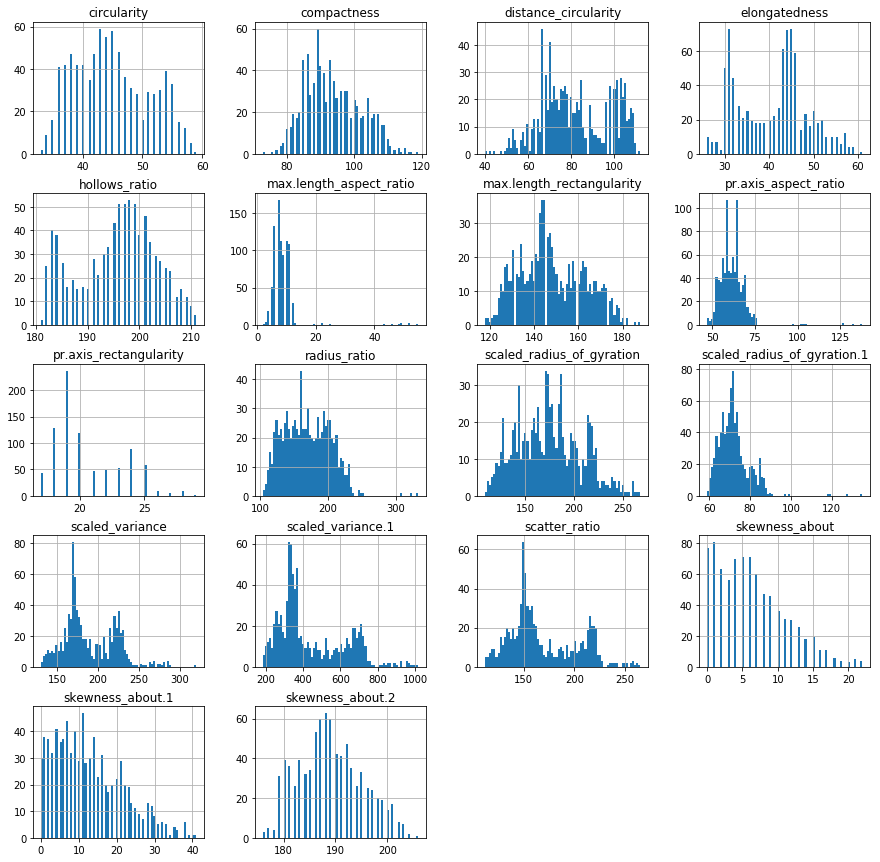

In [9]:
vehicle.hist(figsize=(15,15),grid=True,bins=75);

A lot of features observably display skewed pattern, possibly due to the presence of outliers.
The next step would be to confirm the presence of outliers.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]), <a list of 18 Text xticklabel objects>)

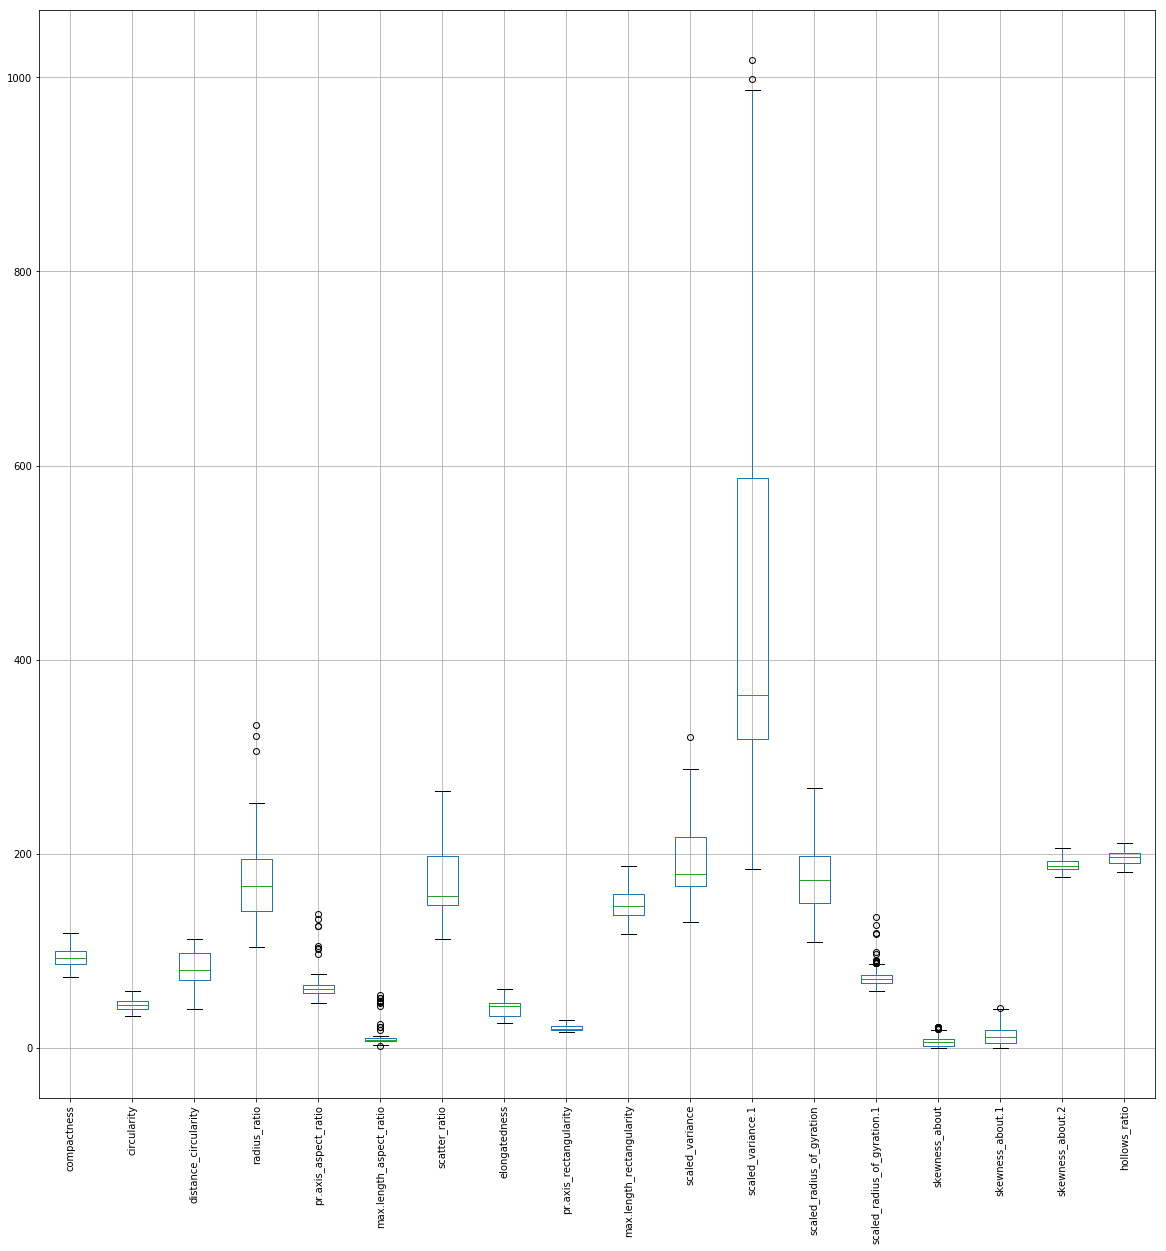

In [10]:
vehicle.boxplot(figsize=(20,20))
plt.xticks(rotation=90)

A lot of variables as seen in the boxplot contain outliers. Proceeding to impute the them. Replacing them with medians

In [11]:
for col in vehicle.columns[:-1]:
    q1= vehicle[col].quantile(0.25)
    q3= vehicle[col].quantile(0.75)
    iqr= q3-q1
    low= q1-1.5*iqr
    high= q3+1.5*iqr
    vehicle.loc[(vehicle[col]<low)| (vehicle[col]>high),col] = vehicle[col].median()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]), <a list of 18 Text xticklabel objects>)

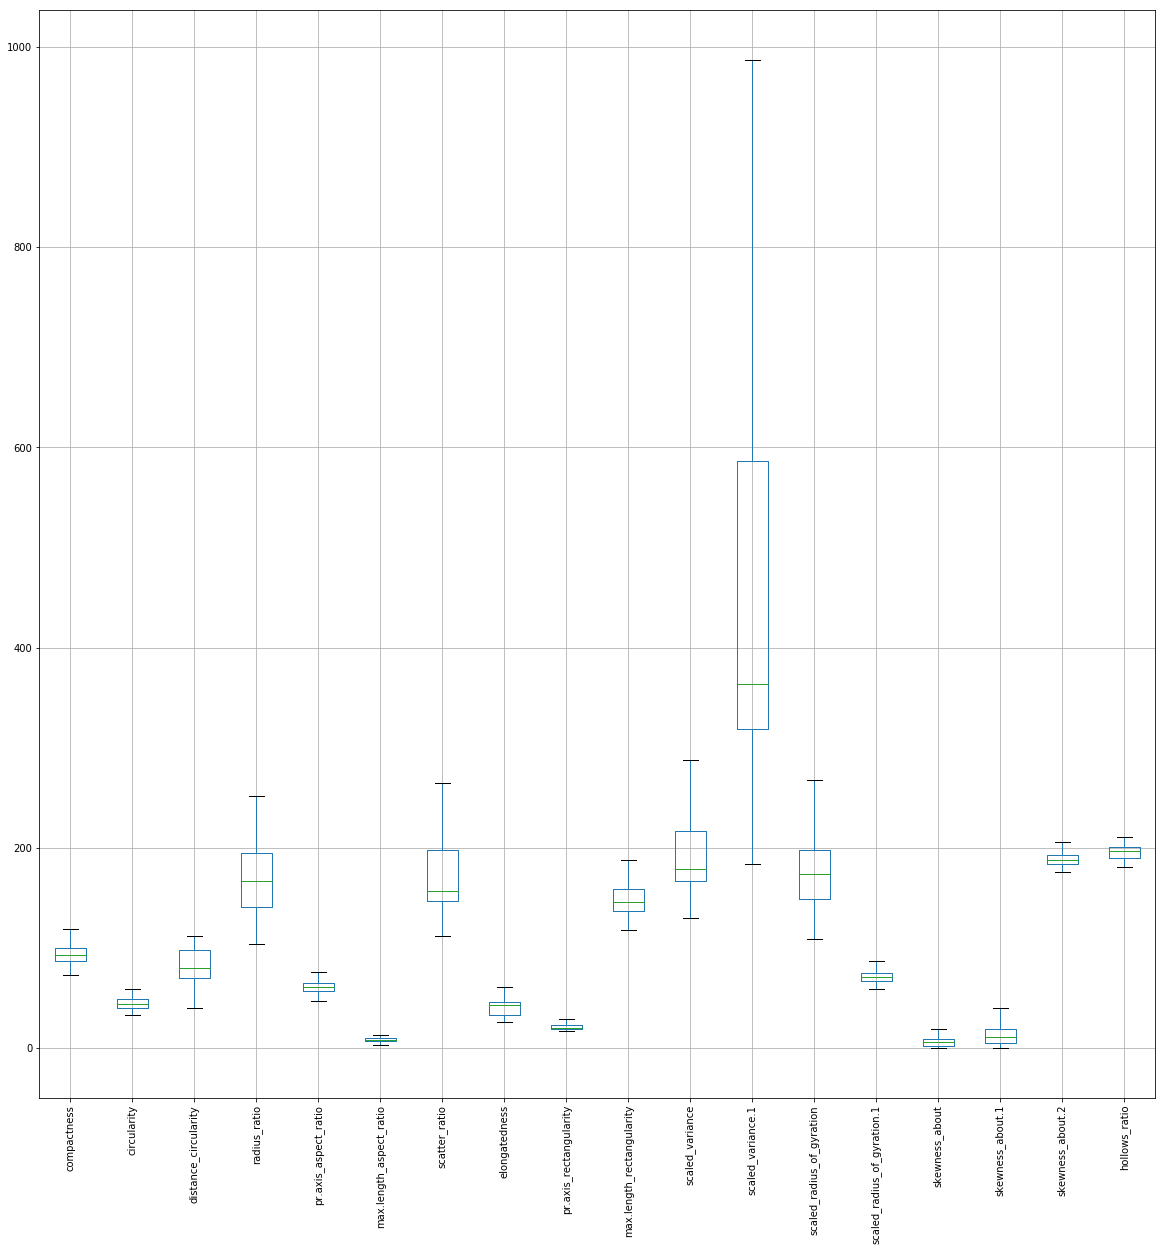

In [12]:
vehicle.boxplot(figsize=(20,20))
plt.xticks(rotation=90)

The boxplot reveals that the outliers have been treated by being replaced by medians of the respective features.

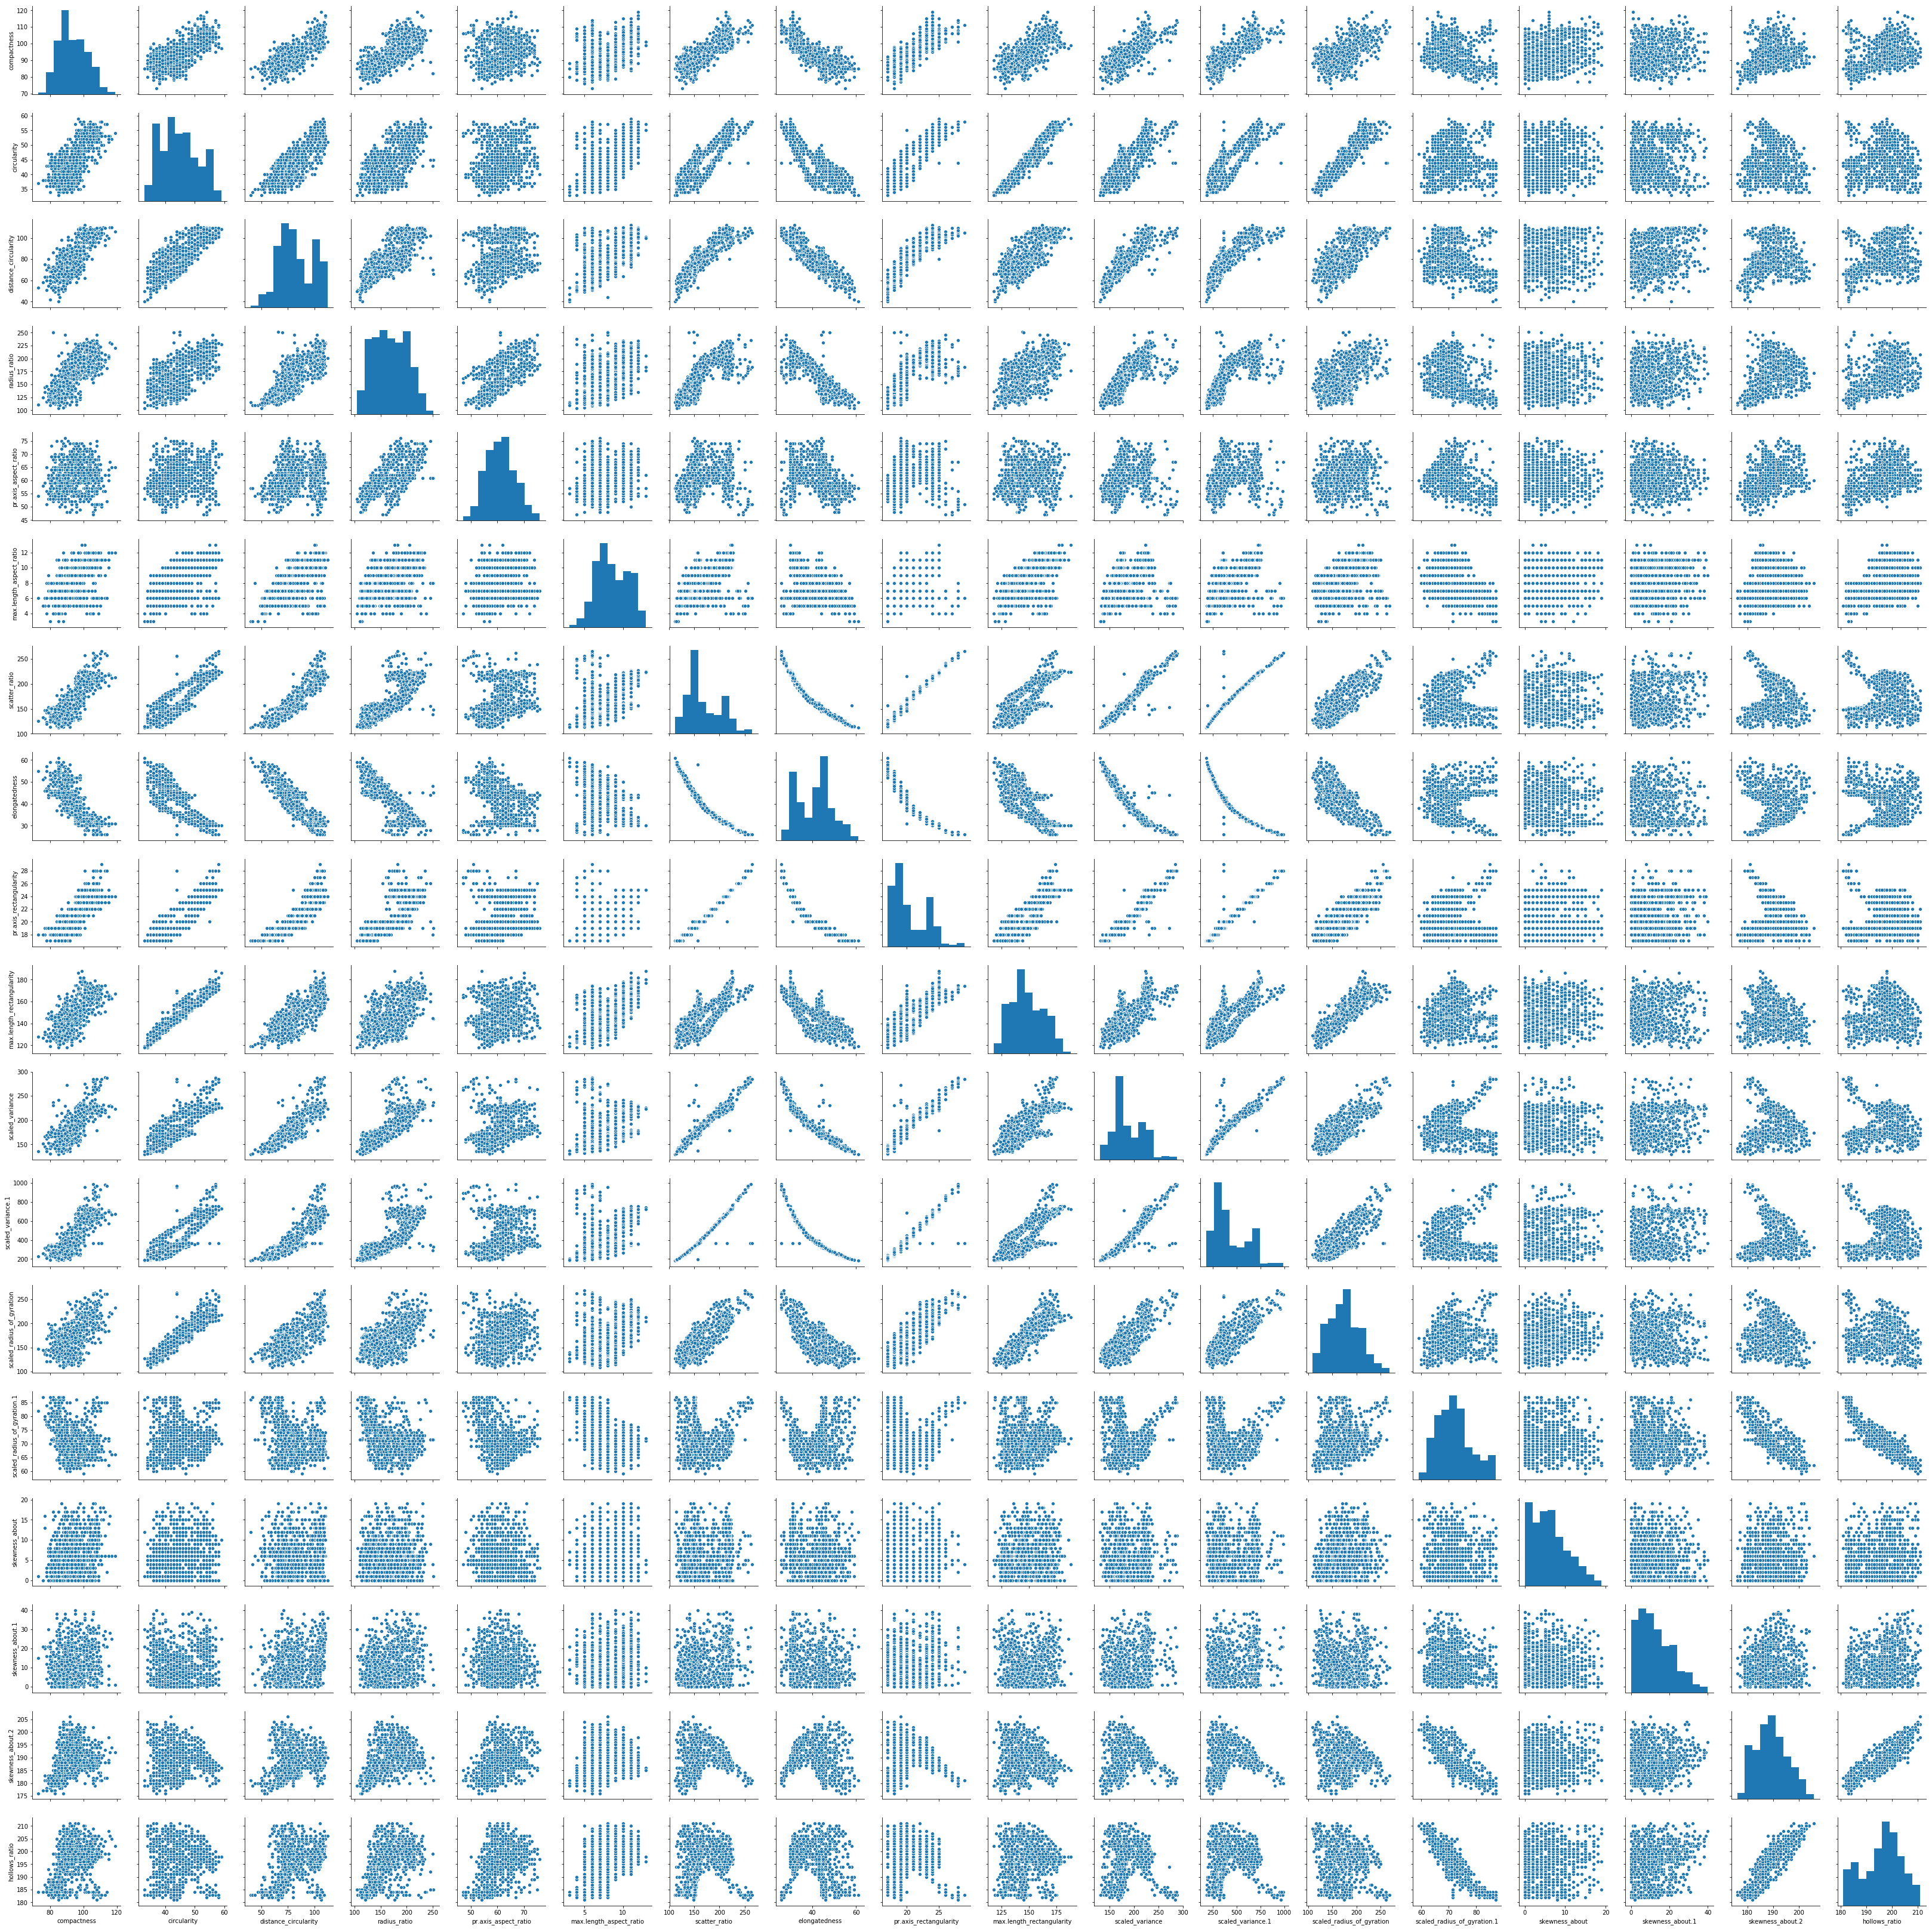

In [67]:
sns.pairplot(vehicle)

As seen on the pairplots, quite a few features have a linear correlation between themselves, all the validation to the fact that PCA will be more helpful with feature reduction.

With the missing values and outliers having been treated.

Next, a heat map will be generated to observe the level of correlation between the 17 features available.

[Text(0, 0, 'compactness'),
 Text(0, 0, 'circularity'),
 Text(0, 0, 'distance_circularity'),
 Text(0, 0, 'radius_ratio'),
 Text(0, 0, 'pr.axis_aspect_ratio'),
 Text(0, 0, 'max.length_aspect_ratio'),
 Text(0, 0, 'scatter_ratio'),
 Text(0, 0, 'elongatedness'),
 Text(0, 0, 'pr.axis_rectangularity'),
 Text(0, 0, 'max.length_rectangularity'),
 Text(0, 0, 'scaled_variance'),
 Text(0, 0, 'scaled_variance.1'),
 Text(0, 0, 'scaled_radius_of_gyration'),
 Text(0, 0, 'scaled_radius_of_gyration.1'),
 Text(0, 0, 'skewness_about'),
 Text(0, 0, 'skewness_about.1'),
 Text(0, 0, 'skewness_about.2'),
 Text(0, 0, 'hollows_ratio'),
 Text(0, 0, 'class')]

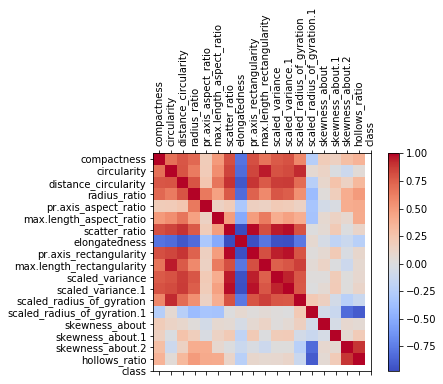

In [13]:
corr = vehicle.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
corr_matrix= ax.matshow(corr,cmap='coolwarm') #displaying an array as a matrix
fig.colorbar(corr_matrix)
ticks = np.arange(0,len(vehicle.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(vehicle.columns)
ax.set_yticklabels(vehicle.columns)

indications of Correlation :
Red : high 
grey : no correlation
Blue : Negative correlation

About 11 features show high amount of correlation amongst themselves.
This information proves useful to the decision on using PCA, as a next step for feature extraction.
Reducing the number of features in this dataset so as to identify essential features of the lot, and have the new features be independant of each other.

Performing PCA

In [14]:
from sklearn.decomposition import PCA

In [16]:
X=vehicle.iloc[:,0:18]

In [17]:
pca=PCA()

In [18]:
pca.fit(X) #fitting the PCA algorithm with our data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

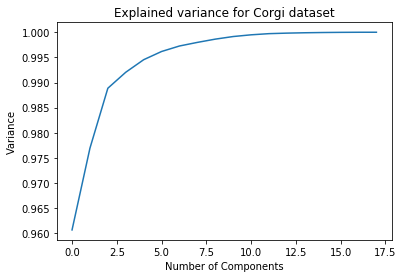

In [22]:
# plotting a screen plot, it explains the cumulative summation of explained variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance')
plt.title('Explained variance for Corgi dataset')
plt.show()

The plot shows that choosing about 10 components should help us save 99.5% of the variance.

Transforming the data with PCA

In [23]:
#instantiating PCA ,but this time using 10 components
pca = PCA(n_components=10)

In [24]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
X_Pca= pca.transform(X)

The PCA has helped bring down the number of essential, independent, orthogonal features to 10.
the code above transforms the previous set using PCA.
Having done this, completes the job of PCA here.

Proceeding, we will now perform GridSearch cross validation
to tune hyperparameters( Characteristics external to the model, whose parameters are not defined in the data) for NaiveBayes and Classifier and support vector machine algorithms.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
y = vehicle.iloc[:,18]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_Pca,y,test_size = 0.3, random_state = 1)

In [29]:
#importing GridSearchCV, SVC, GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [30]:
# Tuning hyperparameters for the SVM algorithm
model_1 = SVC()

In [31]:
parameters = {'C' :[0.01, 0.05, 0.5, 1], 'kernel' : ['linear','rbf']} #providing a dictionary 

In [32]:
model_svc = GridSearchCV(model_1,param_grid = parameters, verbose = 5)
model_svc.fit(X_train,y_train)
print('Optimal parameters are :', model_svc.best_params_)

C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8181818181818182, total=   0.1s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8333333333333334, total=   0.1s
[CV] C=0.01, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] .. C=0.01, kernel=linear, score=0.8520408163265306, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................... C=0.01, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s
C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................... C=0.01, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] .................... C=0.01, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................


C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .. C=0.05, kernel=linear, score=0.8181818181818182, total=   0.6s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.8333333333333334, total=   0.5s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.8520408163265306, total=   0.6s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................... C=0.05, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................


C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] .................... C=0.05, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] .................... C=0.05, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.5, kernel=linear ............................................


C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ... C=0.5, kernel=linear, score=0.8181818181818182, total=   5.7s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.8484848484848485, total=   6.3s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.8418367346938775, total=   3.4s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ..................... C=0.5, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................


C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ..................... C=0.5, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ..................... C=0.5, kernel=rbf, score=0.5, total=   0.0s
[CV] C=1, kernel=linear ..............................................


C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ..... C=1, kernel=linear, score=0.8131313131313131, total=   8.9s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8484848484848485, total=   6.3s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8418367346938775, total=  18.7s
[CV] C=1, kernel=rbf .................................................
[CV] ....................... C=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=1, kernel=rbf .................................................


C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[CV] ....................... C=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ....................... C=1, kernel=rbf, score=0.5, total=   0.0s


C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   54.2s finished


Optimal parameters are : {'C': 0.5, 'kernel': 'linear'}


As per the output, 

{'C': 0.5, 'kernel': 'linear'} are the best choices of hyperparameters for SVM

Next, parameters are going to be assigned the values provided by gridsearch and then cross validated for accuracy

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
model_SVC = SVC(C = 0.5, kernel = 'linear')

In [35]:
Score_svc = cross_val_score(model_SVC,X_Pca,y,cv =10) # Cross validation will be performed across 10 folds to obtain the best possible accuracy

In [40]:
print(Score_svc)

print('Least possible accuracy',Score_svc.min()*100)

print('Maximum accuracy possible',Score_svc.max()*100)

print('Mean accuracy',Score_svc.mean()*100)

[0.81176471 0.85882353 0.85882353 0.84705882 0.81176471 0.82352941
 0.89411765 0.81176471 0.8452381  0.85365854]
Least possible accuracy 81.17647058823529
Maximum accuracy possible 89.41176470588236
Mean accuracy 84.16543690646989


Through this investigation, 
we are able to conclude that, 
SVM with the chosen hyperparameters can predict/classify with a mean accuracy of 84%

Prediction using KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
model_2= KNeighborsClassifier()

In [50]:
params =  {'n_neighbors': np.arange(3, 15),
        'weights': ['uniform', 'distance']}

In [51]:
model_knn = GridSearchCV(model_2,param_grid = params, verbose = 5)
model_knn.fit(X_train,y_train)
print('Optimal parameters for knn are :', model_knn.best_params_)

C:\Users\kamalashree\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] n_neighbors=3, weights=uniform ..................................
[CV]  n_neighbors=3, weights=uniform, score=0.7828282828282829, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV]  n_neighbors=3, weights=uniform, score=0.8686868686868687, total=   0.0s
[CV] n_neighbors=3, weights=uniform ..................................
[CV]  n_neighbors=3, weights=uniform, score=0.8163265306122449, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=distance, score=0.8131313131313131, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=distance, score=0.8686868686868687, total=   0.0s
[CV] n_neighbors=3, weights=distance .................................
[CV]  n_neighbors=3, weights=distance, score=0.826530612244898, total=   0.0s
[CV] n_neighbors=4, weights=uniform .......

[CV]  n_neighbors=12, weights=distance, score=0.7676767676767676, total=   0.0s
[CV] n_neighbors=12, weights=distance ................................
[CV]  n_neighbors=12, weights=distance, score=0.8535353535353535, total=   0.0s
[CV] n_neighbors=12, weights=distance ................................
[CV]  n_neighbors=12, weights=distance, score=0.8010204081632653, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV]  n_neighbors=13, weights=uniform, score=0.7626262626262627, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV]  n_neighbors=13, weights=uniform, score=0.8333333333333334, total=   0.0s
[CV] n_neighbors=13, weights=uniform .................................
[CV]  n_neighbors=13, weights=uniform, score=0.7908163265306123, total=   0.0s
[CV] n_neighbors=13, weights=distance ................................
[CV]  n_neighbors=13, weights=distance, score=0.7777777777777778, total=   0.0s
[CV] n_neighbors=

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    2.1s finished


Per GridSearch, {'n_neighbors': 3, 'weights': 'distance'} are the best options to combine and use, for KNN.


In [55]:
model_KNN = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

In [57]:
Score_knn = cross_val_score(model_KNN,X_Pca,y,cv =10)

In [58]:
print(Score_knn)

print('Least possible accuracy',Score_knn.min()*100)

print('Maximum accuracy possible',Score_knn.max()*100)

print('Mean accuracy',Score_knn.mean()*100)

[0.78823529 0.8        0.85882353 0.87058824 0.85882353 0.89411765
 0.89411765 0.81176471 0.88095238 0.8902439 ]
Least possible accuracy 78.82352941176471
Maximum accuracy possible 89.41176470588236
Mean accuracy 85.47666871626701


Compared to SVM, KNN has provided slightly better accuracy at prediction, when looking at the mean score.

Prediction using Gaussian Naive Bayes

In [59]:
model_gnb = GaussianNB()

In [60]:
Score_gnb = cross_val_score(model_gnb,X_Pca,y,cv =10)

In [61]:
print(Score_gnb)

print('Least possible accuracy',Score_gnb.min()*100)

print('Maximum accuracy possible',Score_gnb.max()*100)

print('Mean accuracy',Score_gnb.mean()*100)

[0.74117647 0.8        0.76470588 0.77647059 0.8        0.74117647
 0.81176471 0.67058824 0.80952381 0.81707317]
Least possible accuracy 67.05882352941175
Maximum accuracy possible 81.70731707317073
Mean accuracy 77.32479333196693


Among the choice of SVM, KNN and Naive Bayes

The order of preference based on accuracy was : KNN, SVM, Naive bayes

Summary:

1. The "Corgi" data set provided, had 17 features describing each and every vehicle model that was photographed.
2. Using PCA for feature extraction was the crux of this project.
3. Implimentation of PCA helped bring down the count of essential features to 10 independant, orthogonal featres.
4. GridSearchCV was used to find optimal hyperparameters for SVM and KNN.
5. Cross validation scores were obtained to measure the percentage of accuracy with which the algorithms were able to classify / distinguish between the pictures of sillhouettes of car , van and bus provided.

6. KNN, SVM performed much better than NaiveBayes.